## Linear Regression with Catagorical Features

In [2]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
class LinearRegression:
        
    def hyp(self):
        return np.dot(self.X, self.theta)
        
    def get_cost(self):
        return sum((self.hyp() - self.y)**2) / (self.m * 2.0)
    
    def fscale(self):
        self.X= self.X / (self.X.max(axis= 0) - self.X.min(axis= 0))
        self.y= self.y / (max(self.y) - min(self.y))
        
    def computeStandard(self):
        from sklearn.linear_model import LinearRegression
        self.linreg= LinearRegression()
        self.linreg.fit(self.X, self.y)

    def makedummy(self, X, col):
        dumm= pd.get_dummies(X[col], prefix=col)
        X= pd.concat([X, dumm], axis=1)
        X= X.drop(col, 1)
        return X
        
        
    def preprocess(self, X, y, alpha):
        (self.m, self.n)= X.shape
        self.columns= X.columns
        self.X= X.values
        self.y= y.values
        self.fscale()
        self.computeStandard()
        self.n+=1
        self.X= np.insert(self.X, 0, 1, axis= 1)
        self.y= self.y[None].transpose()
        self.alpha= alpha
        self.theta= (np.ones(self.n)*10)[None].transpose()
        
    def plot(self):
        plt.title("Contirbution of each feature in the output")
        colors = ['yellowgreen', 'violet',  'gold', 'lightskyblue', 'red', 'green', 'blue', 'lightcoral']
        plt.pie(abs(self.theta), labels=self.columns.insert(0, 'Base'), autopct='%1.1f%%', colors= colors)
        for i in range(1, self.n):
            f= plt.figure()
            ax = f.add_subplot(111)
            yd= (max(self.X[:,i] * self.theta[i]) - min(self.X[:,i] * self.theta[i]))
            yy= self.y* yd
            offset= yd * self.theta[0]
            ax.scatter(self.X[:,i], yy)
            ax.plot([0,1.0], [offset, self.theta[i]+offset], 'g')
            plt.ylabel('Effect on price')
            plt.xlabel('{}'.format(self.columns[i-1]))
        
    def fit(self, X, y, alpha= 0.1, cat=None):
        if cat is not None:
            X= self.makedummy(X, cat)
            #print(X.sample(10))
            #print(X.columns)
        self.preprocess(X, y, alpha)
        pc= math.inf
        change= 1
        iteration=0
        while(change>0.000000001):
            der = (self.hyp() - self.y).transpose()
            der = np.dot(der , self.X) * self.alpha / self.m
            self.theta= self.theta - der.transpose()

            self.cost= self.get_cost()
            change= pc - self.cost
            pc= self.cost
            iteration += 1
            if(iteration % 500 == 0):
                print("{}. Cost: {}, theta: {}".format(iteration, self.cost, self.theta.transpose()))
        print('+'*70, "\n{}. Final Cost: {}, theta: {}".format(iteration, self.cost, self.theta.transpose()))
        print("sklearn: theta: ",self.linreg.intercept_, self.linreg.coef_,"\n")
        
            
    def predict(self, X):
        X= X.values
        X= X / (X.max(axis= 0) - X.min(axis= 0))
        X= np.insert(X, 0, 1, axis= 1)
        return np.dot(X, self.theta)
    
    def mse(self, y_true, y_pred):
        y_true= y_true.values
        y_true= y_true / (max(y_true) - min(y_true))
        y_true= y_true[None].transpose()
        return sum((y_true - y_pred)**2) / y_true.shape[0]
    
    def rmsq(self, y_true, y_pred):
        return np.sqrt(self.mse(y_true, y_pred))

### Soil Content Dataset

* water
* sand
* silt
* clay
* gases
* geoarea
* organic_matter

In [4]:
m = 1800
np.random.seed(42)

water= np.random.randint(low= 0, high= 10, size= m)
sand= np.random.randint(low= 100, high= 1300, size= m)
silt= np.random.randint(low= 10, high= 25, size= m)
clay= np.random.randint(low= 50, high= 100, size= m)
gases= np.random.randint(low= 1, high= 15, size= m)
organic_matter= np.random.randint(low= 12, high= 51, size= m)

geo= ['ice', 'forest', 'city']
geo_values= {'ice':24, 'forest':54, 'city':12}
geoarea= ['ram']*m
for i in range(m):
    geoarea[i]= random.choice(geo)

value= 5 * water + 2.5 * sand + 6.0 * silt + 2.2 * clay + 7.2 * gases + 3.2 * organic_matter 
for i in range(m):
    value[i]+= geo_values.get(geoarea[i])
    
data= pd.DataFrame({'water':water, 'sand':sand, 'silt':silt, 'clay':clay, 'gases':gases, 'geoarea':geoarea, 'organic_matter':organic_matter, 'value':value})
data.head(2)

,water,sand,silt,clay,gases,geoarea,organic_matter,value
0,6,594,20,65,12,forest,46,2065.6
1,3,526,19,55,8,forest,20,1740.6


In [5]:
featue_cols= ['water', 'sand', 'silt', 'clay', 'gases', 'geoarea', 'organic_matter']
target_col= 'value'
X= data[featue_cols]
y= data[target_col]

In [6]:
linreg= LinearRegression()
linreg.fit(X, y, cat='geoarea', alpha= 0.1)

500. Cost: [0.05399588], theta: [[-3.00346228 -0.19453786  0.65853387 -0.53673888 -0.78919627 -0.17084429
  -0.33206476  5.66425452  5.66070396  5.67157924]]
1000. Cost: [0.0104469], theta: [[-4.11455911 -0.08918353  0.78842975 -0.2182662  -0.3060301  -0.07117609
  -0.14182837  5.29149209  5.29846898  5.29547982]]
1500. Cost: [0.00203688], theta: [[-4.60510215 -0.03158545  0.87070063 -0.08172157 -0.11597346 -0.01512223
  -0.04167952  5.12687952  5.13730052  5.13071781]]
2000. Cost: [0.00039714], theta: [[-4.82170282e+00 -6.09568863e-03  9.07461863e-01 -2.14293669e-02
  -3.23947867e-02  9.65510420e-03  2.80812855e-03  5.05419301e+00
   5.06612280e+00  5.05798138e+00]]
2500. Cost: [7.74333687e-05], theta: [[-4.91734513e+00  5.15995437e-03  9.23701848e-01  5.19388762e-03
   4.50471013e-03  2.05946323e-02  2.24565861e-02  5.02209748e+00
   5.03469335e+00  5.02586403e+00]]
3000. Cost: [1.50976575e-05], theta: [[-4.95957705  0.01013001  0.93087293  0.01694969  0.02079799  0.02542507
   0.031

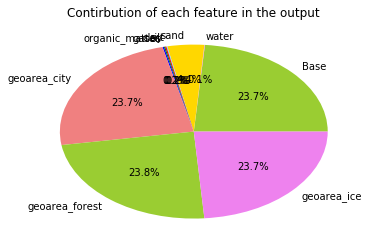

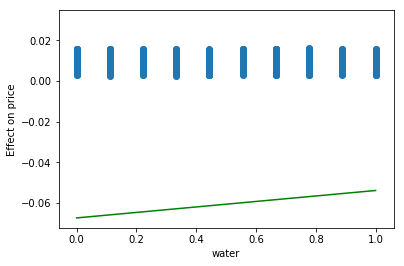

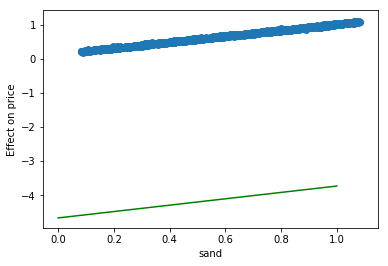

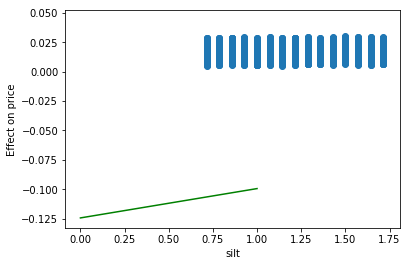

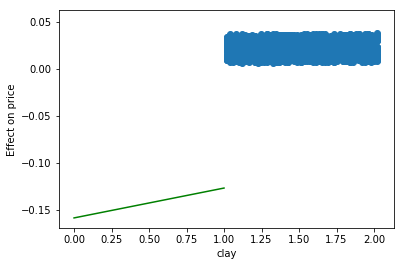

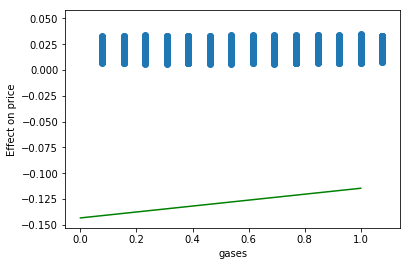

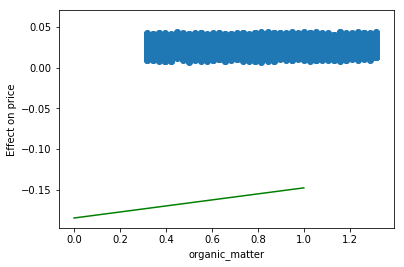

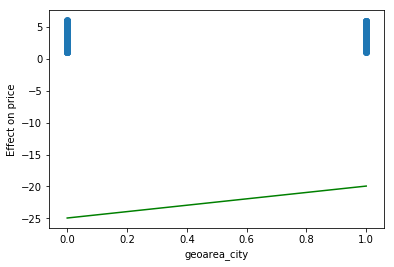

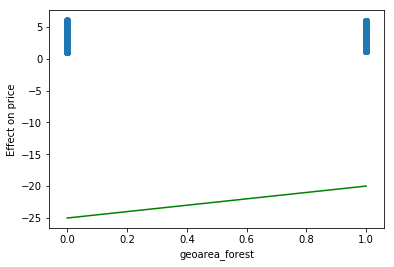

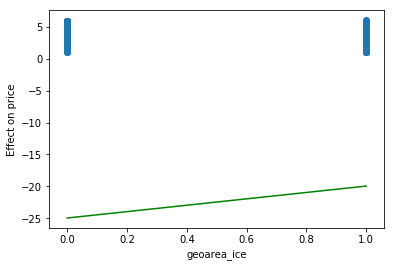

In [7]:
linreg.plot()

In [10]:
dumm= pd.get_dummies(X['geoarea'], prefix='geoarea')
X= pd.concat([X, dumm], axis=1)
X= X.drop('geoarea', 1)

from sklearn.linear_model import LinearRegression as LR
lr= LR()
lr.fit(X, y)
print(lr.intercept_, lr.coef_)

30.000000000011823 [  5.    2.5   6.    2.2   7.2   3.2 -18.   24.   -6. ]
